In [5]:
import networkx as nx
import pandas as pd
from operator import itemgetter
import matplotlib.pyplot as plt


In [6]:
timus_G = nx.read_edgelist('./nx_create/nx_graph_df_timus.csv'
                     , create_using=nx.DiGraph()
                     , nodetype=int
                     , data=[('weight', int)]
                     )




In [8]:
list(timus_G.edges(data=True))

[(1000, 1001, {'weight': 1251}),
 (1000, 1293, {'weight': 887}),
 (1000, 1068, {'weight': 466}),
 (1000, 1264, {'weight': 348}),
 (1000, 1409, {'weight': 203}),
 (1000, 2012, {'weight': 131}),
 (1000, 1005, {'weight': 96}),
 (1000, 1785, {'weight': 87}),
 (1000, 1014, {'weight': 72}),
 (1000, 1020, {'weight': 68}),
 (1000, 1296, {'weight': 67}),
 (1000, 1025, {'weight': 66}),
 (1000, 1207, {'weight': 53}),
 (1000, 1225, {'weight': 51}),
 (1000, 2066, {'weight': 37}),
 (1000, 1877, {'weight': 36}),
 (1000, 1209, {'weight': 36}),
 (1000, 1820, {'weight': 34}),
 (1000, 1100, {'weight': 32}),
 (1000, 1086, {'weight': 31}),
 (1000, 1607, {'weight': 27}),
 (1000, 2001, {'weight': 23}),
 (1000, 1083, {'weight': 22}),
 (1000, 1119, {'weight': 21}),
 (1000, 1787, {'weight': 20}),
 (1000, 1297, {'weight': 19}),
 (1000, 1496, {'weight': 18}),
 (1000, 2100, {'weight': 18}),
 (1000, 1009, {'weight': 16}),
 (1000, 1197, {'weight': 15}),
 (1000, 1018, {'weight': 15}),
 (1000, 1196, {'weight': 15}),
 

In [9]:
len(list(timus_G.edges(data=True)))

55870

In [10]:
from tqdm import tqdm
node_dict_degree_clus = {}
pr = nx.pagerank(timus_G)

degree_centralityG = nx.degree_centrality(timus_G)

eigenvector_centralityG = nx.eigenvector_centrality(timus_G,weight='weight')

average_degree_connectivityG = nx.average_degree_connectivity(timus_G, weight="weight")

harmonic_centralityG = nx.harmonic_centrality(timus_G,distance='weight')

betweenness_centralityG = nx.betweenness_centrality(timus_G,weight='weight')

for node_id in tqdm(nx.nodes(timus_G)):
    metadata = {}
    metadata['PageRank'] = round(pr[node_id],5)
    metadata['DegreeCentrality'] = round(degree_centralityG[node_id],5)
    metadata['EigenvectorCentrality'] = round(eigenvector_centralityG[node_id],5)
    metadata['HarmonicCentrality'] = round(harmonic_centralityG[node_id],5)
    metadata['BetweennessCentrality'] = round(betweenness_centralityG[node_id],5)
    ego = nx.ego_graph(timus_G, node_id, distance='weight')
    metadata['ClusteringCoeff'] = round(nx.average_clustering(ego,weight='weight'),5)
    node_dict_degree_clus[node_id] = metadata

   

100%|██████████████████████████████████████████████████████████████████████████████| 1149/1149 [01:27<00:00, 13.16it/s]


In [11]:
import pickle
pickle.dump(node_dict_degree_clus, open( 'timus_node_dict_Centrality_clus_single_features.pkl', 'wb'))   

In [12]:
node_dict_degree_clus


{1000: {'PageRank': 0.01633,
  'DegreeCentrality': 0.90157,
  'EigenvectorCentrality': 0.22054,
  'HarmonicCentrality': 652.33333,
  'BetweennessCentrality': 0.04975,
  'ClusteringCoeff': 0.00555},
 1001: {'PageRank': 0.01053,
  'DegreeCentrality': 0.62718,
  'EigenvectorCentrality': 0.27045,
  'HarmonicCentrality': 634.53333,
  'BetweennessCentrality': 0.02565,
  'ClusteringCoeff': 0.00233},
 1293: {'PageRank': 0.00788,
  'DegreeCentrality': 0.33624,
  'EigenvectorCentrality': 0.33264,
  'HarmonicCentrality': 583.11667,
  'BetweennessCentrality': 0.00629,
  'ClusteringCoeff': 0.00313},
 1409: {'PageRank': 0.009,
  'DegreeCentrality': 0.38676,
  'EigenvectorCentrality': 0.41785,
  'HarmonicCentrality': 580.73333,
  'BetweennessCentrality': 0.00636,
  'ClusteringCoeff': 0.00253},
 2012: {'PageRank': 0.00596,
  'DegreeCentrality': 0.27265,
  'EigenvectorCentrality': 0.34999,
  'HarmonicCentrality': 559.56667,
  'BetweennessCentrality': 0.00296,
  'ClusteringCoeff': 0.00433},
 1785: {'Pag

In [13]:

timus_sna = []
for item_id,metadata in tqdm(node_dict_degree_clus.items()):
    singledata = {}
    singledata['item_id'] = item_id
    singledata['PageRank'] = metadata['PageRank']
    singledata['DegreeCentrality'] = metadata['DegreeCentrality']
    singledata['EigenvectorCentrality'] = metadata['EigenvectorCentrality']
    singledata['HarmonicCentrality'] = metadata['HarmonicCentrality']
    singledata['BetweennessCentrality'] = metadata['BetweennessCentrality']
    singledata['ClusteringCoeff'] = metadata['ClusteringCoeff']
    timus_sna.append(singledata)

100%|██████████████████████████████████████████████████████████████████████████| 1149/1149 [00:00<00:00, 574336.23it/s]


In [14]:
timus_sna_analysis = pd.DataFrame(timus_sna)
timus_sna_analysis_item_id = timus_sna_analysis.set_index('item_id')
timus_sna_analysis_item_id

,PageRank,DegreeCentrality,EigenvectorCentrality,HarmonicCentrality,BetweennessCentrality,ClusteringCoeff
item_id,,,,,,
1000,0.01633,0.90157,0.22054,652.33333,0.04975,0.00555
1001,0.01053,0.62718,0.27045,634.53333,0.02565,0.00233
1293,0.00788,0.33624,0.33264,583.11667,0.00629,0.00313
1409,0.00900,0.38676,0.41785,580.73333,0.00636,0.00253
2012,0.00596,0.27265,0.34999,559.56667,0.00296,0.00433
...,...,...,...,...,...,...
1411,0.00019,0.00523,0.00000,377.46667,0.00002,0.00000
1460,0.00024,0.00348,0.00000,288.32619,0.00008,0.00000
1388,0.00017,0.00348,0.00000,338.55000,0.00002,0.00000


In [16]:
import numpy as np
max_min_scaler = lambda x : (x-np.min(x))/(np.max(x)-np.min(x))

timus_sna_analysis['HarmonicCentrality'] = timus_sna_analysis[['HarmonicCentrality']].apply(max_min_scaler)
timus_sna_analysis_item_id['HarmonicCentrality'] = timus_sna_analysis_item_id[['HarmonicCentrality']].apply(max_min_scaler)


##
timus_sna_analysis['PageRank'] = timus_sna_analysis[['PageRank']].apply(max_min_scaler)
timus_sna_analysis_item_id['PageRank'] = timus_sna_analysis_item_id[['PageRank']].apply(max_min_scaler)

##
timus_sna_analysis['DegreeCentrality'] = timus_sna_analysis[['DegreeCentrality']].apply(max_min_scaler)
timus_sna_analysis_item_id['DegreeCentrality'] = timus_sna_analysis_item_id[['DegreeCentrality']].apply(max_min_scaler)
##

timus_sna_analysis['EigenvectorCentrality'] = timus_sna_analysis[['EigenvectorCentrality']].apply(max_min_scaler)
timus_sna_analysis_item_id['EigenvectorCentrality'] = timus_sna_analysis_item_id[['EigenvectorCentrality']].apply(max_min_scaler)
#
timus_sna_analysis['ClusteringCoeff'] = timus_sna_analysis[['ClusteringCoeff']].apply(max_min_scaler)
timus_sna_analysis_item_id['ClusteringCoeff'] = timus_sna_analysis_item_id[['ClusteringCoeff']].apply(max_min_scaler)
#
# BetweennessCentrality
timus_sna_analysis['BetweennessCentrality'] = timus_sna_analysis[['BetweennessCentrality']].apply(max_min_scaler)
timus_sna_analysis_item_id['BetweennessCentrality'] = timus_sna_analysis_item_id[['BetweennessCentrality']].apply(max_min_scaler)
##

In [17]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=1)

In [18]:
# neigh.fit(timus_sna_analysis[['PageRank','DegreeCentrality','EigenvectorCentrality','HarmonicCentrality','BetweennessCentrality','ClusteringCoeff']].values)
neigh.fit(timus_sna_analysis[['PageRank']].values)

NearestNeighbors(n_neighbors=1)

In [20]:
#pagerank

recall_item_num = 11
timus = pd.read_csv('./nx_create/nx_graph_df_timus.csv',header=None,sep=' ',names=['source','target','weight'])
# timus = pd.read_csv('./nx_create/clean__data_full_.txt',sep='\t')
val_source_target = []
for _ ,group in timus.groupby('source'):
#     tmp = group.iloc[np.random.choice(range(len(group)),1)[0],:]
    tmp = group.iloc[0,:]
    val_source_target.append((tmp.source,tmp.target))
val_source_target
source_target = list(zip(timus.source.tolist(),timus.target.tolist()))
# source_target_dict = {}

item_recall_list = {}
for iid in tqdm(timus_sna_analysis['item_id'].unique()):
    ind = neigh.kneighbors(timus_sna_analysis_item_id.loc[iid,'PageRank'].reshape((1,-1)),recall_item_num, return_distance=False)
    item_recall_list[iid] = timus_sna_analysis.loc[ind.tolist()[0]].iloc[:,0].tolist()[1:]
#     print(item_recall_list)
  


def metrics_recall(eva_data,item_recall_list, k=10):
    item_num = len(item_recall_list)
    
    hit_num = 0
    score=0
    past = []
    for iid, recall_list in tqdm(item_recall_list.items()):

        tmp_recall_items = item_recall_list[iid][:k] 
        for s,t in eva_data:
            if s == iid and t in list(tmp_recall_items):
#                 print("标注：",s,t)
                rank = list(tmp_recall_items).index(t)
                score += 1.0/(rank+1.0)
                hit_num += 1
                break
    

    

    ###
            
    mrr_score = round(score* 1.0 / item_num, 5)
    hit_rate = round(hit_num * 1.0 / item_num, 5)
    print(' topk: ', k, ' : ', 'hit_num: ', hit_num, 'hit_rate: ', hit_rate, 'user_num : ', item_num)
    print(' topk: ', k, ' : ', 'hit_num: ', hit_num, 'mrr_score: ', mrr_score, 'user_num : ', item_num)
        
        



100%|████████████████████████████████████████████████████████████████████████████| 1149/1149 [00:00<00:00, 1567.91it/s]


In [ ]:
# demo[1001],demo[1000],demo[2056]

In [21]:
metrics_recall(source_target,item_recall_list,3)

100%|█████████████████████████████████████████████████████████████████████████████| 1149/1149 [00:08<00:00, 130.22it/s]

 topk:  3  :  hit_num:  220 hit_rate:  0.19147 user_num :  1149
 topk:  3  :  hit_num:  220 mrr_score:  0.11691 user_num :  1149


In [22]:
metrics_recall(source_target,item_recall_list,5)

100%|█████████████████████████████████████████████████████████████████████████████| 1149/1149 [00:08<00:00, 137.66it/s]

 topk:  5  :  hit_num:  302 hit_rate:  0.26284 user_num :  1149
 topk:  5  :  hit_num:  302 mrr_score:  0.11913 user_num :  1149


In [23]:
metrics_recall(source_target,item_recall_list,10)

100%|█████████████████████████████████████████████████████████████████████████████| 1149/1149 [00:07<00:00, 152.04it/s]

 topk:  10  :  hit_num:  437 hit_rate:  0.38033 user_num :  1149
 topk:  10  :  hit_num:  437 mrr_score:  0.10988 user_num :  1149


In [26]:
#DegreeCentrality

neigh1 = NearestNeighbors(n_neighbors=1)
neigh1.fit(timus_sna_analysis[['DegreeCentrality']].values)

NearestNeighbors(n_neighbors=1)

In [27]:
#pagerank

recall_item_num = 11
timus = pd.read_csv('./nx_create/nx_graph_df_timus.csv',header=None,sep=' ',names=['source','target','weight'])

source_target = list(zip(timus.source.tolist(),timus.target.tolist()))


item_recall_list = {}
for iid in tqdm(timus_sna_analysis['item_id'].unique()):
    ind = neigh1.kneighbors(timus_sna_analysis_item_id.loc[iid,'DegreeCentrality'].reshape((1,-1)),recall_item_num, return_distance=False)
    item_recall_list[iid] = timus_sna_analysis.loc[ind.tolist()[0]].iloc[:,0].tolist()[1:]


def metrics_recall(eva_data,item_recall_list, k=10):
    item_num = len(item_recall_list)
    
    hit_num = 0
    score=0
    past = []
    for iid, recall_list in tqdm(item_recall_list.items()):#从item列表中读取每一个item
        # 获取前k个召回的结果
        tmp_recall_items = item_recall_list[iid][:k] #返回一个item的列表
        for s,t in eva_data:
            if s == iid and t in list(tmp_recall_items):#在评估数据中查找是否存在推荐列表中
#                 print("标注：",s,t)
                rank = list(tmp_recall_items).index(t)
                score += 1.0/(rank+1.0)
                hit_num += 1
                break
    
    ###
    

    ###
            
    mrr_score = round(score* 1.0 / item_num, 5)
    hit_rate = round(hit_num * 1.0 / item_num, 5)
    print(' topk: ', k, ' : ', 'hit_num: ', hit_num, 'hit_rate: ', hit_rate, 'user_num : ', item_num)
    print(' topk: ', k, ' : ', 'hit_num: ', hit_num, 'mrr_score: ', mrr_score, 'user_num : ', item_num)
        
        



100%|████████████████████████████████████████████████████████████████████████████| 1149/1149 [00:00<00:00, 1345.16it/s]


In [28]:
metrics_recall(source_target,item_recall_list,3)

100%|█████████████████████████████████████████████████████████████████████████████| 1149/1149 [00:08<00:00, 128.99it/s]

 topk:  3  :  hit_num:  238 hit_rate:  0.20714 user_num :  1149
 topk:  3  :  hit_num:  238 mrr_score:  0.12388 user_num :  1149


In [29]:
metrics_recall(source_target,item_recall_list,5)

100%|█████████████████████████████████████████████████████████████████████████████| 1149/1149 [00:08<00:00, 137.02it/s]

 topk:  5  :  hit_num:  334 hit_rate:  0.29069 user_num :  1149
 topk:  5  :  hit_num:  334 mrr_score:  0.12492 user_num :  1149


In [30]:
metrics_recall(source_target,item_recall_list,10)

100%|█████████████████████████████████████████████████████████████████████████████| 1149/1149 [00:07<00:00, 151.70it/s]

 topk:  10  :  hit_num:  469 hit_rate:  0.40818 user_num :  1149
 topk:  10  :  hit_num:  469 mrr_score:  0.11814 user_num :  1149


In [31]:
#EigenvectorCentrality
neigh2 = NearestNeighbors(n_neighbors=1)
neigh2.fit(timus_sna_analysis[['EigenvectorCentrality']].values)
   

NearestNeighbors(n_neighbors=1)

In [51]:
#pagerank

recall_item_num = 11
timus = pd.read_csv('./nx_create/nx_graph_df_timus.csv',header=None,sep=' ',names=['source','target','weight'])

source_target = list(zip(timus.source.tolist(),timus.target.tolist()))


item_recall_list = {}
for iid in tqdm(timus_sna_analysis['item_id'].unique()):
    ind = neigh2.kneighbors(timus_sna_analysis_item_id.loc[iid,'EigenvectorCentrality'].reshape((1,-1)),recall_item_num, return_distance=False)
    item_recall_list[iid] = timus_sna_analysis.loc[ind.tolist()[0]].iloc[:,0].tolist()[:]


def metrics_recall(eva_data,item_recall_list, k=10):
    item_num = len(item_recall_list)
    
    hit_num = 0
    score=0
    past = []
    for iid, recall_list in tqdm(item_recall_list.items()):#从item列表中读取每一个item
        # 获取前k个召回的结果
        tmp_recall_items = item_recall_list[iid][:k] #返回一个item的列表
        for s,t in eva_data:
            if s == iid and t in list(tmp_recall_items):#在评估数据中查找是否存在推荐列表中
#                 print("标注：",s,t)
                rank = list(tmp_recall_items).index(t)
                score += 1.0/(rank+1.0)
                hit_num += 1
                break
    
    ###
    

    ###
            
    mrr_score = round(score* 1.0 / item_num, 5)
    hit_rate = round(hit_num * 1.0 / item_num, 5)
    print(' topk: ', k, ' : ', 'hit_num: ', hit_num, 'hit_rate: ', hit_rate, 'user_num : ', item_num)
    print(' topk: ', k, ' : ', 'hit_num: ', hit_num, 'mrr_score: ', mrr_score, 'user_num : ', item_num)
        
        



100%|████████████████████████████████████████████████████████████████████████████| 1149/1149 [00:00<00:00, 1497.81it/s]


In [52]:
metrics_recall(source_target,item_recall_list,3)

100%|█████████████████████████████████████████████████████████████████████████████| 1149/1149 [00:09<00:00, 124.93it/s]

 topk:  3  :  hit_num:  192 hit_rate:  0.1671 user_num :  1149
 topk:  3  :  hit_num:  192 mrr_score:  0.08283 user_num :  1149


In [57]:
metrics_recall(source_target,item_recall_list,5)

100%|█████████████████████████████████████████████████████████████████████████████| 1149/1149 [00:08<00:00, 131.04it/s]

 topk:  5  :  hit_num:  288 hit_rate:  0.25065 user_num :  1149
 topk:  5  :  hit_num:  288 mrr_score:  0.09149 user_num :  1149


In [58]:
metrics_recall(source_target,item_recall_list,10)

100%|█████████████████████████████████████████████████████████████████████████████| 1149/1149 [00:08<00:00, 142.68it/s]

 topk:  10  :  hit_num:  418 hit_rate:  0.36379 user_num :  1149
 topk:  10  :  hit_num:  418 mrr_score:  0.08835 user_num :  1149


array([[1148, 1142, 1146, 1143, 1134, 1147, 1145, 1144, 1106, 1135,  976]],
      dtype=int64)

In [60]:
# HarmonicCentrality
neigh3 = NearestNeighbors(n_neighbors=1)
neigh3.fit(timus_sna_analysis[['HarmonicCentrality']].values)

NearestNeighbors(n_neighbors=1)

In [61]:


recall_item_num = 11
timus = pd.read_csv('./nx_create/nx_graph_df_timus.csv',header=None,sep=' ',names=['source','target','weight'])

source_target = list(zip(timus.source.tolist(),timus.target.tolist()))


item_recall_list = {}
for iid in tqdm(timus_sna_analysis['item_id'].unique()):
    ind = neigh3.kneighbors(timus_sna_analysis_item_id.loc[iid,'HarmonicCentrality'].reshape((1,-1)),recall_item_num, return_distance=False)
    item_recall_list[iid] = timus_sna_analysis.loc[ind.tolist()[0]].iloc[:,0].tolist()[:]


def metrics_recall(eva_data,item_recall_list, k=10):
    item_num = len(item_recall_list)
    
    hit_num = 0
    score=0
    past = []
    for iid, recall_list in tqdm(item_recall_list.items()):#从item列表中读取每一个item
        # 获取前k个召回的结果
        tmp_recall_items = item_recall_list[iid][:k] #返回一个item的列表
        for s,t in eva_data:
            if s == iid and t in list(tmp_recall_items):#在评估数据中查找是否存在推荐列表中
#                 print("标注：",s,t)
                rank = list(tmp_recall_items).index(t)
                score += 1.0/(rank+1.0)
                hit_num += 1
                break
    
    ###
    

    ###
            
    mrr_score = round(score* 1.0 / item_num, 5)
    hit_rate = round(hit_num * 1.0 / item_num, 5)
    print(' topk: ', k, ' : ', 'hit_num: ', hit_num, 'hit_rate: ', hit_rate, 'user_num : ', item_num)
    print(' topk: ', k, ' : ', 'hit_num: ', hit_num, 'mrr_score: ', mrr_score, 'user_num : ', item_num)
        
        



100%|████████████████████████████████████████████████████████████████████████████| 1149/1149 [00:00<00:00, 1568.19it/s]


In [62]:
metrics_recall(source_target,item_recall_list,3)

100%|█████████████████████████████████████████████████████████████████████████████| 1149/1149 [00:09<00:00, 119.41it/s]

 topk:  3  :  hit_num:  170 hit_rate:  0.14795 user_num :  1149
 topk:  3  :  hit_num:  170 mrr_score:  0.06397 user_num :  1149


In [63]:
metrics_recall(source_target,item_recall_list,5)
    

100%|█████████████████████████████████████████████████████████████████████████████| 1149/1149 [00:09<00:00, 127.08it/s]

 topk:  5  :  hit_num:  266 hit_rate:  0.23151 user_num :  1149
 topk:  5  :  hit_num:  266 mrr_score:  0.07411 user_num :  1149


In [66]:
metrics_recall(source_target,item_recall_list,10)


100%|█████████████████████████████████████████████████████████████████████████████| 1149/1149 [00:08<00:00, 142.45it/s]

 topk:  10  :  hit_num:  427 hit_rate:  0.37163 user_num :  1149
 topk:  10  :  hit_num:  427 mrr_score:  0.07634 user_num :  1149


In [67]:
# 4'BetweennessCentrality','ClusteringCoeff'
neigh4 = NearestNeighbors(n_neighbors=1)
neigh4.fit(timus_sna_analysis[['BetweennessCentrality']].values)


NearestNeighbors(n_neighbors=1)

In [68]:


recall_item_num = 11
timus = pd.read_csv('./nx_create/nx_graph_df_timus.csv',header=None,sep=' ',names=['source','target','weight'])

source_target = list(zip(timus.source.tolist(),timus.target.tolist()))


item_recall_list = {}
for iid in tqdm(timus_sna_analysis['item_id'].unique()):
    ind = neigh4.kneighbors(timus_sna_analysis_item_id.loc[iid,'BetweennessCentrality'].reshape((1,-1)),recall_item_num, return_distance=False)
    item_recall_list[iid] = timus_sna_analysis.loc[ind.tolist()[0]].iloc[:,0].tolist()[:]


def metrics_recall(eva_data,item_recall_list, k=10):
    item_num = len(item_recall_list)
    
    hit_num = 0
    score=0
    past = []
    for iid, recall_list in tqdm(item_recall_list.items()):#从item列表中读取每一个item
        # 获取前k个召回的结果
        tmp_recall_items = item_recall_list[iid][:k] #返回一个item的列表
        for s,t in eva_data:
            if s == iid and t in list(tmp_recall_items):#在评估数据中查找是否存在推荐列表中
#                 print("标注：",s,t)
                rank = list(tmp_recall_items).index(t)
                score += 1.0/(rank+1.0)
                hit_num += 1
                break
    
    ###
    

    ###
            
    mrr_score = round(score* 1.0 / item_num, 5)
    hit_rate = round(hit_num * 1.0 / item_num, 5)
    print(' topk: ', k, ' : ', 'hit_num: ', hit_num, 'hit_rate: ', hit_rate, 'user_num : ', item_num)
    print(' topk: ', k, ' : ', 'hit_num: ', hit_num, 'mrr_score: ', mrr_score, 'user_num : ', item_num)
        
        



100%|████████████████████████████████████████████████████████████████████████████| 1149/1149 [00:00<00:00, 1530.53it/s]


In [71]:
metrics_recall(source_target,item_recall_list,3)

100%|█████████████████████████████████████████████████████████████████████████████| 1149/1149 [00:09<00:00, 123.34it/s]

 topk:  3  :  hit_num:  144 hit_rate:  0.12533 user_num :  1149
 topk:  3  :  hit_num:  144 mrr_score:  0.0631 user_num :  1149


In [72]:
metrics_recall(source_target,item_recall_list,5)

100%|█████████████████████████████████████████████████████████████████████████████| 1149/1149 [00:08<00:00, 130.18it/s]

 topk:  5  :  hit_num:  243 hit_rate:  0.21149 user_num :  1149
 topk:  5  :  hit_num:  243 mrr_score:  0.07425 user_num :  1149


In [73]:
metrics_recall(source_target,item_recall_list,10)

100%|█████████████████████████████████████████████████████████████████████████████| 1149/1149 [00:08<00:00, 142.21it/s]

 topk:  10  :  hit_num:  374 hit_rate:  0.3255 user_num :  1149
 topk:  10  :  hit_num:  374 mrr_score:  0.07527 user_num :  1149


In [75]:

neigh5 = NearestNeighbors(n_neighbors=1)
neigh5.fit(timus_sna_analysis[['ClusteringCoeff']].values)

NearestNeighbors(n_neighbors=1)

In [76]:


recall_item_num = 11
timus = pd.read_csv('./nx_create/nx_graph_df_timus.csv',header=None,sep=' ',names=['source','target','weight'])

source_target = list(zip(timus.source.tolist(),timus.target.tolist()))


item_recall_list = {}
for iid in tqdm(timus_sna_analysis['item_id'].unique()):
    ind = neigh5.kneighbors(timus_sna_analysis_item_id.loc[iid,'ClusteringCoeff'].reshape((1,-1)),recall_item_num, return_distance=False)
    item_recall_list[iid] = timus_sna_analysis.loc[ind.tolist()[0]].iloc[:,0].tolist()[:]


def metrics_recall(eva_data,item_recall_list, k=10):
    item_num = len(item_recall_list)
    
    hit_num = 0
    score=0
    past = []
    for iid, recall_list in tqdm(item_recall_list.items()):#从item列表中读取每一个item
        # 获取前k个召回的结果
        tmp_recall_items = item_recall_list[iid][:k] #返回一个item的列表
        for s,t in eva_data:
            if s == iid and t in list(tmp_recall_items):#在评估数据中查找是否存在推荐列表中
#                 print("标注：",s,t)
                rank = list(tmp_recall_items).index(t)
                score += 1.0/(rank+1.0)
                hit_num += 1
                break
    
    ###
    

    ###
            
    mrr_score = round(score* 1.0 / item_num, 5)
    hit_rate = round(hit_num * 1.0 / item_num, 5)
    print(' topk: ', k, ' : ', 'hit_num: ', hit_num, 'hit_rate: ', hit_rate, 'user_num : ', item_num)
    print(' topk: ', k, ' : ', 'hit_num: ', hit_num, 'mrr_score: ', mrr_score, 'user_num : ', item_num)
        
        



100%|████████████████████████████████████████████████████████████████████████████| 1149/1149 [00:00<00:00, 1524.50it/s]


In [77]:
metrics_recall(source_target,item_recall_list,3)

100%|█████████████████████████████████████████████████████████████████████████████| 1149/1149 [00:09<00:00, 121.01it/s]

 topk:  3  :  hit_num:  161 hit_rate:  0.14012 user_num :  1149
 topk:  3  :  hit_num:  161 mrr_score:  0.06368 user_num :  1149


In [78]:
metrics_recall(source_target,item_recall_list,5)

100%|█████████████████████████████████████████████████████████████████████████████| 1149/1149 [00:08<00:00, 129.45it/s]

 topk:  5  :  hit_num:  270 hit_rate:  0.23499 user_num :  1149
 topk:  5  :  hit_num:  270 mrr_score:  0.07856 user_num :  1149


In [79]:
metrics_recall(source_target,item_recall_list,10)

100%|█████████████████████████████████████████████████████████████████████████████| 1149/1149 [00:07<00:00, 144.64it/s]

 topk:  10  :  hit_num:  432 hit_rate:  0.37598 user_num :  1149
 topk:  10  :  hit_num:  432 mrr_score:  0.08251 user_num :  1149


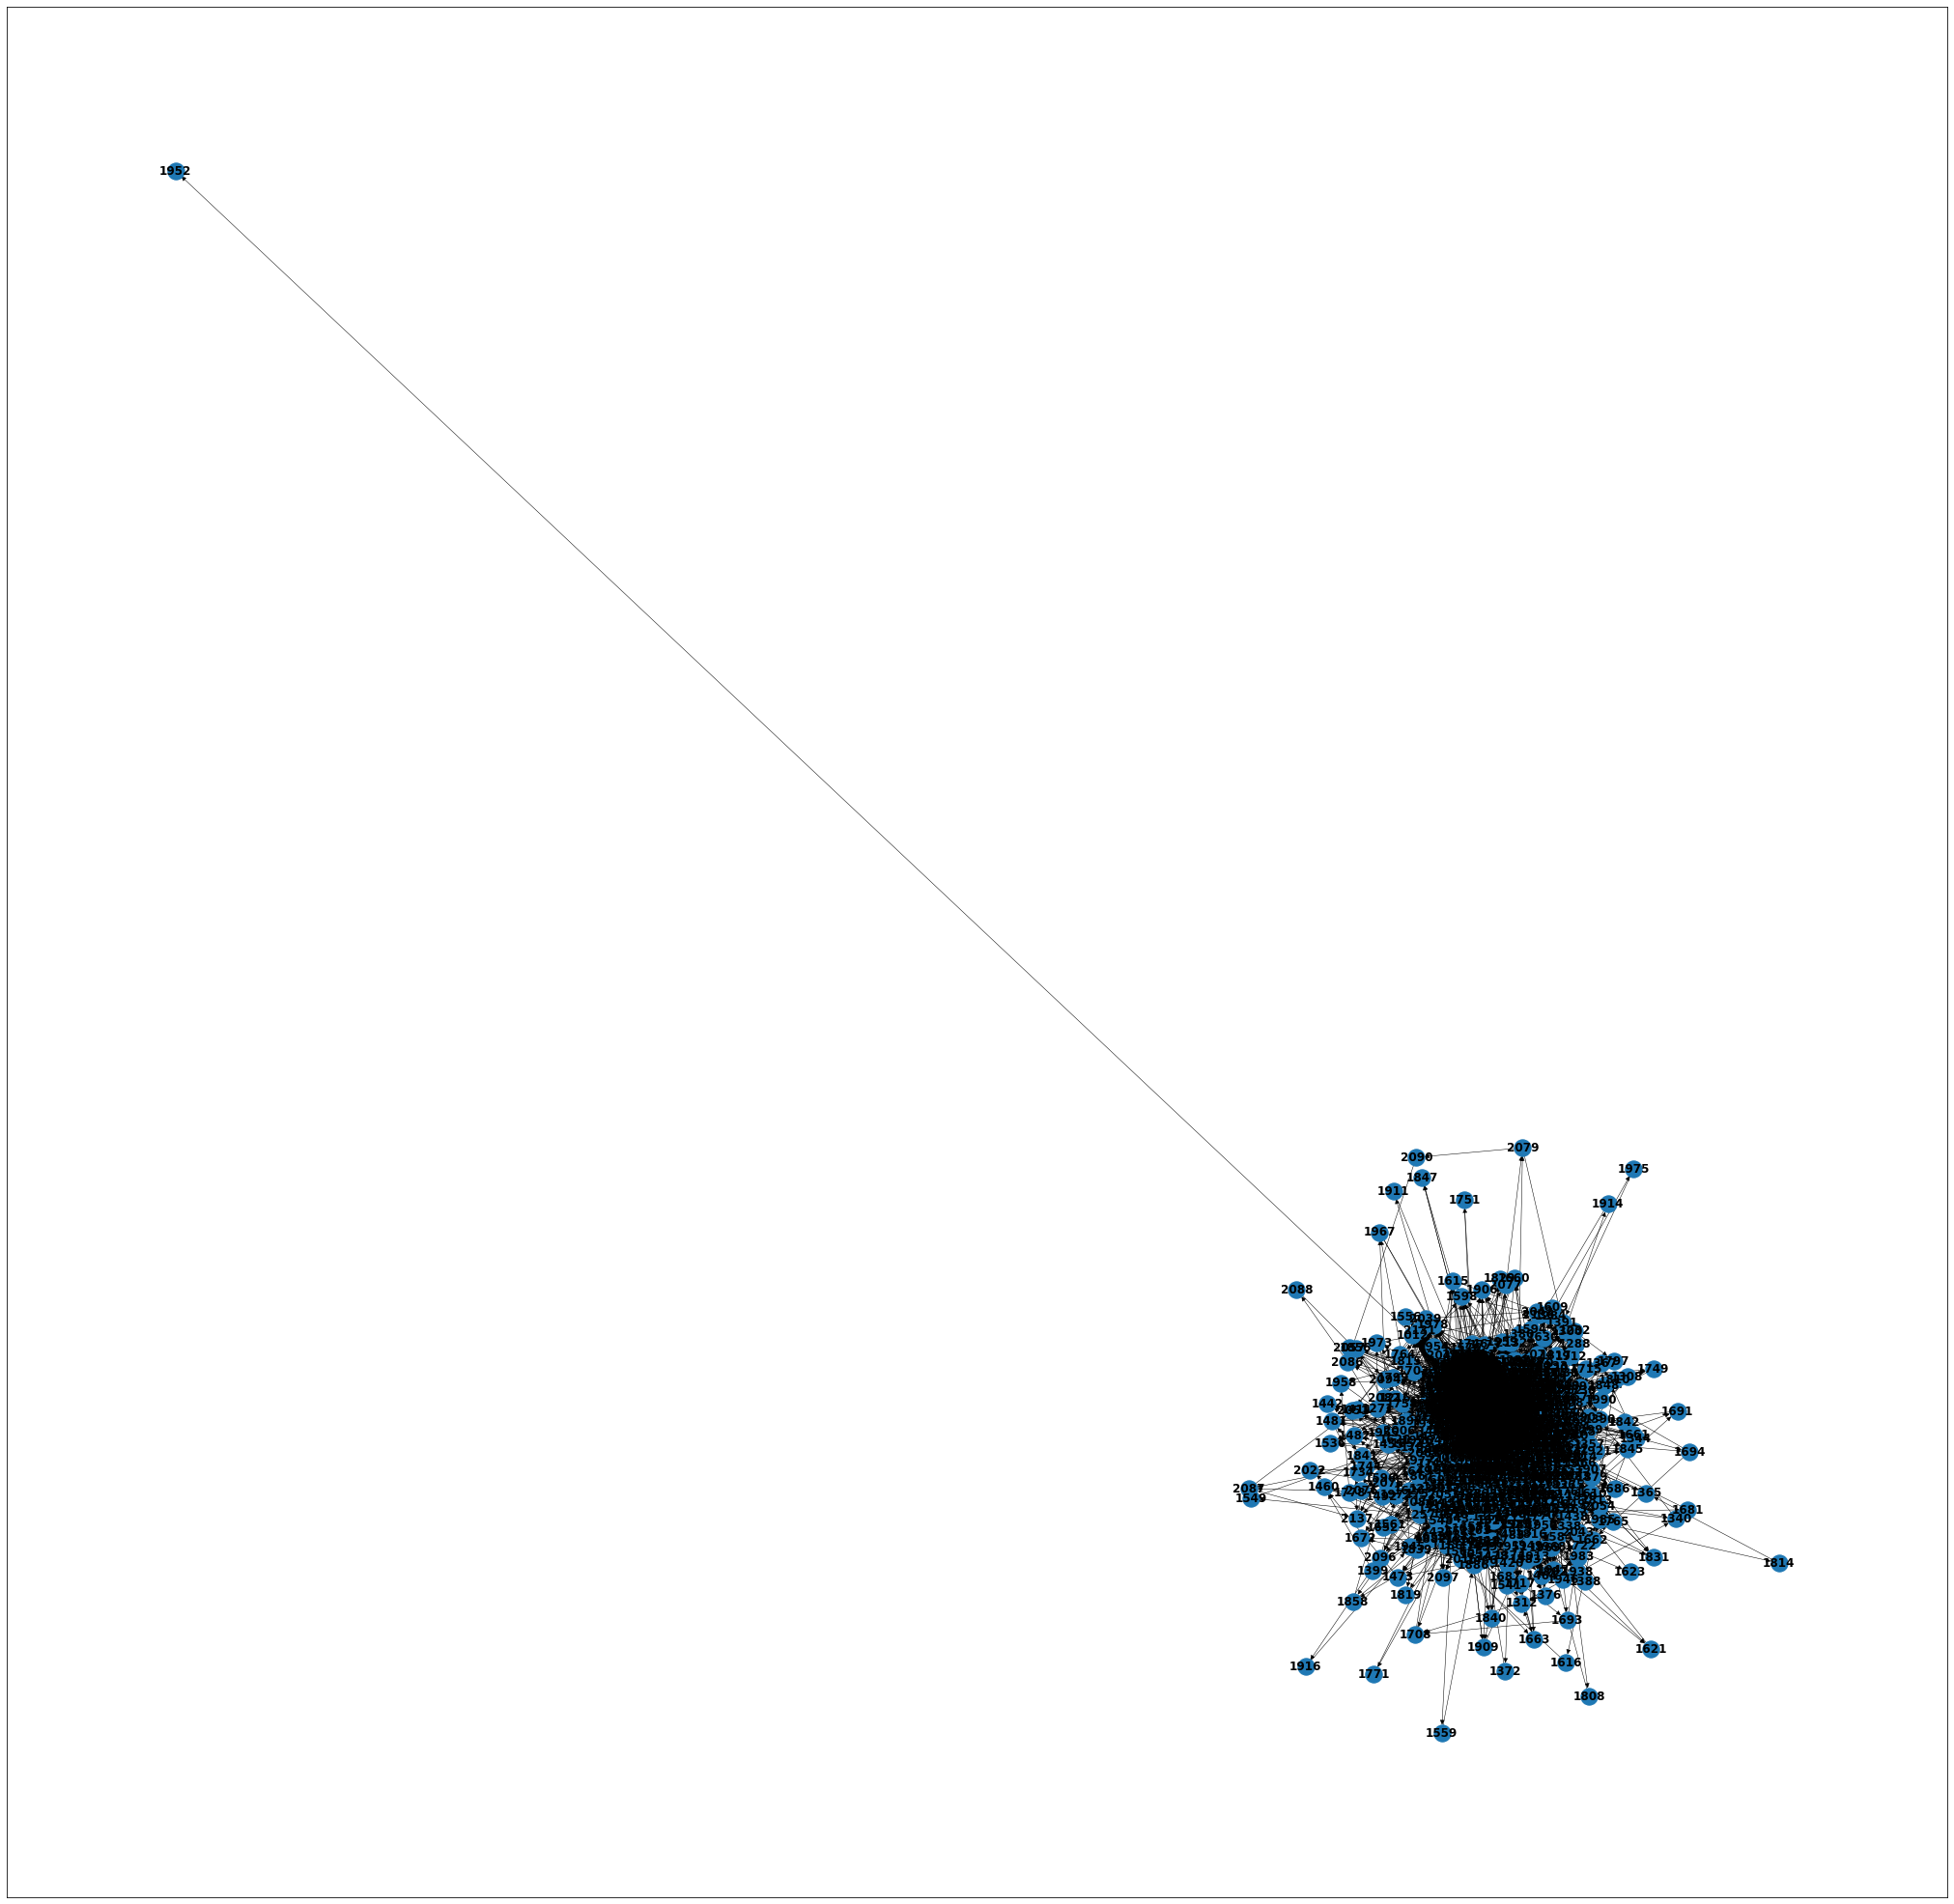

In [82]:
plt.subplots(1,1,figsize=(36,36))
nx.draw(timus_G,with_labels=True, font_weight='bold',width = 0.5)
# nx.draw(timus_G, font_weight='bold',width = 0.5)
plt.axis('on')
plt.show()